In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


In [32]:
df = pd.read_csv('weatherAUS.csv')

In [33]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [34]:
print("La data tiene: ", df.shape[0], " filas y ", df.shape[1], " columnas")

La data tiene:  145460  filas y  23  columnas


In [35]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [37]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [38]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [39]:
df.interpolate(method='linear', inplace=True)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Aplicar interpolación lineal a las columnas numéricas
df[numeric_columns] = df[numeric_columns].interpolate(method='linear')
df['RainToday'].fillna(method='ffill', inplace=True)
df['RainTomorrow'].fillna(method='ffill', inplace=True)
# Llenar los valores nulos en las columnas restantes con el método de llenado hacia adelante
columns_to_fill_forward = ['Evaporation', 'Sunshine', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Cloud3pm']
for column in columns_to_fill_forward:
    df[column].fillna(method='ffill', inplace=True)

# Llenar los valores nulos en 'Evaporation', 'Sunshine' y 'Cloud3pm' con el promedio agrupado por 'Location'
columns_to_fill_mean = ['Evaporation', 'Sunshine', 'Cloud3pm']
for column in columns_to_fill_mean:
    df[column] = df.groupby('Location')[column].transform(lambda x: x.fillna(x.mean()))

# Llenar los valores nulos en 'Evaporation' y 'Sunshine' con el promedio global
columns_to_fill_mean = ['Evaporation', 'Sunshine']
for column in columns_to_fill_mean:
    df[column].fillna(df[column].mean(), inplace=True)

df.isnull().sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_11416\4166195024.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_11416\4166195024.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RainToday'].fillna(method='ffill', inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_11416\4166195024.py:5: FutureWarning: Series.f

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [40]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [41]:
df.duplicated().sum()

0

In [42]:
df.MinTemp.value_counts()

MinTemp
11.000000    903
10.200000    900
9.600000     897
10.500000    886
10.800000    873
            ... 
17.367152      1
17.360499      1
17.353846      1
17.347193      1
26.350000      1
Name: count, Length: 1502, dtype: int64

In [43]:
df.MaxTemp.value_counts()

MaxTemp
20.000000    885
19.000000    843
19.800000    840
20.400000    834
19.900000    825
            ... 
23.169917      1
23.155602      1
23.141286      1
23.126971      1
35.150000      1
Name: count, Length: 1476, dtype: int64

(array([   0,    1,    2, ..., 1499, 1500, 1501]),
 [Text(0, 0, '11.0'),
  Text(1, 0, '10.2'),
  Text(2, 0, '9.6'),
  Text(3, 0, '10.5'),
  Text(4, 0, '10.8'),
  Text(5, 0, '9.0'),
  Text(6, 0, '10.0'),
  Text(7, 0, '12.0'),
  Text(8, 0, '8.9'),
  Text(9, 0, '13.0'),
  Text(10, 0, '10.4'),
  Text(11, 0, '9.7'),
  Text(12, 0, '11.3'),
  Text(13, 0, '11.5'),
  Text(14, 0, '11.8'),
  Text(15, 0, '10.9'),
  Text(16, 0, '8.5'),
  Text(17, 0, '12.7'),
  Text(18, 0, '11.4'),
  Text(19, 0, '11.6'),
  Text(20, 0, '12.4'),
  Text(21, 0, '13.2'),
  Text(22, 0, '9.3'),
  Text(23, 0, '12.2'),
  Text(24, 0, '9.8'),
  Text(25, 0, '10.7'),
  Text(26, 0, '9.4'),
  Text(27, 0, '12.5'),
  Text(28, 0, '11.7'),
  Text(29, 0, '10.3'),
  Text(30, 0, '9.2'),
  Text(31, 0, '8.0'),
  Text(32, 0, '11.2'),
  Text(33, 0, '8.2'),
  Text(34, 0, '14.2'),
  Text(35, 0, '11.9'),
  Text(36, 0, '9.5'),
  Text(37, 0, '9.9'),
  Text(38, 0, '8.4'),
  Text(39, 0, '13.8'),
  Text(40, 0, '13.5'),
  Text(41, 0, '13.4'),
  Text(

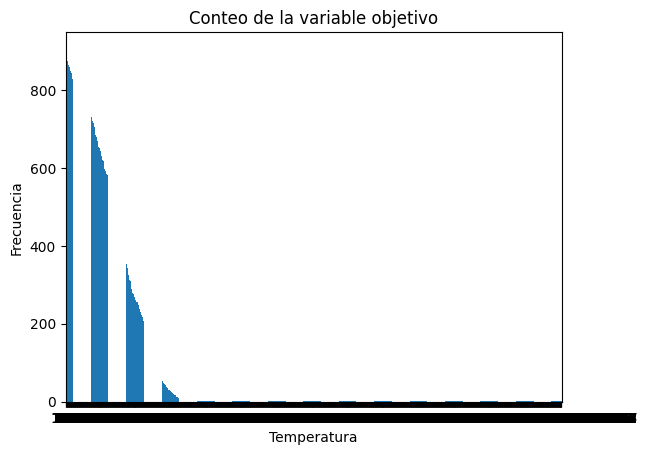

In [44]:
df.MinTemp.value_counts().plot(kind="bar")

plt.title("Conteo de la variable objetivo")
plt.xlabel("Temperatura")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)

(array([   0,    1,    2, ..., 1473, 1474, 1475]),
 [Text(0, 0, '20.0'),
  Text(1, 0, '19.0'),
  Text(2, 0, '19.8'),
  Text(3, 0, '20.4'),
  Text(4, 0, '19.9'),
  Text(5, 0, '20.8'),
  Text(6, 0, '19.5'),
  Text(7, 0, '18.5'),
  Text(8, 0, '21.0'),
  Text(9, 0, '18.2'),
  Text(10, 0, '20.2'),
  Text(11, 0, '18.9'),
  Text(12, 0, '19.6'),
  Text(13, 0, '19.4'),
  Text(14, 0, '21.2'),
  Text(15, 0, '18.8'),
  Text(16, 0, '25.0'),
  Text(17, 0, '18.0'),
  Text(18, 0, '17.0'),
  Text(19, 0, '20.1'),
  Text(20, 0, '22.2'),
  Text(21, 0, '18.4'),
  Text(22, 0, '17.8'),
  Text(23, 0, '22.5'),
  Text(24, 0, '22.0'),
  Text(25, 0, '19.2'),
  Text(26, 0, '17.5'),
  Text(27, 0, '20.7'),
  Text(28, 0, '21.5'),
  Text(29, 0, '20.3'),
  Text(30, 0, '21.4'),
  Text(31, 0, '23.0'),
  Text(32, 0, '20.5'),
  Text(33, 0, '19.1'),
  Text(34, 0, '19.3'),
  Text(35, 0, '20.9'),
  Text(36, 0, '23.4'),
  Text(37, 0, '21.1'),
  Text(38, 0, '21.8'),
  Text(39, 0, '19.7'),
  Text(40, 0, '22.4'),
  Text(41, 0, '2

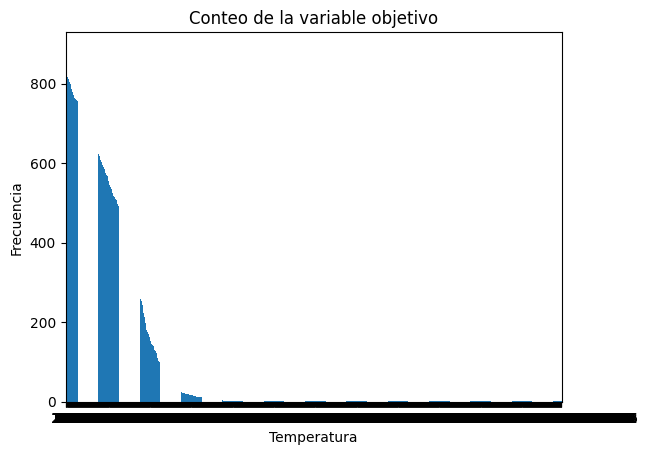

In [45]:
df.MaxTemp.value_counts().plot(kind="bar")

plt.title("Conteo de la variable objetivo")
plt.xlabel("Temperatura")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)

In [46]:
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

C:\Users\HP\AppData\Local\Temp\ipykernel_11416\1475822537.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 0], data=df, y='MinTemp', x=None, palette="Set1")
C:\Users\HP\AppData\Local\Temp\ipykernel_11416\1475822537.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(ax=axes[0, 1], data=df, x='MinTemp', palette="Set1")
C:\Users\HP\AppData\Local\Temp\ipykernel_11416\1475822537.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1, 0], data=df, y='MaxTemp', x=None, palette="Set1")
C:\Users\HP\AppData\Local\Temp\ipykernel_11416\1475822537.py:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  s

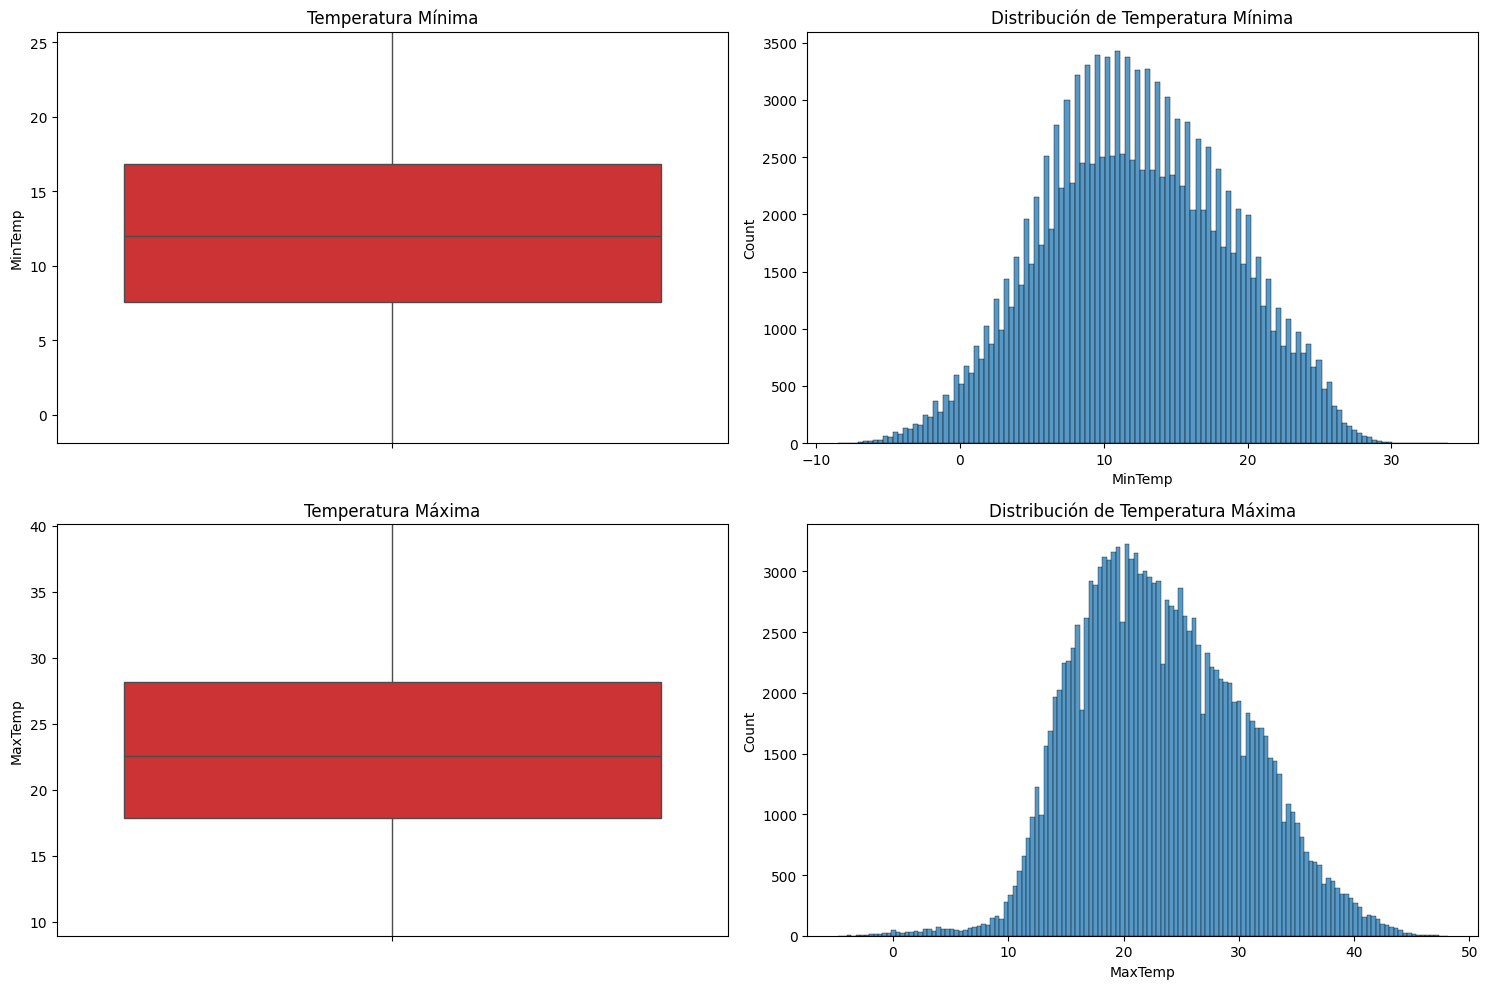

In [47]:


fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Un diagrama de caja y bigote en la primera parcela sobre la variable MinTemp
sns.boxplot(ax=axes[0, 0], data=df, y='MinTemp', x=None, palette="Set1")
axes[0, 0].set_title("Temperatura Mínima")

# Ajustar límites del eje y para MinTemp
ylim_min, ylim_max = df['MinTemp'].quantile([0.01, 0.99])
axes[0, 0].set_ylim(ylim_min, ylim_max)

# Un histograma en la segunda parcela sobre la variable MinTemp
sns.histplot(ax=axes[0, 1], data=df, x='MinTemp', palette="Set1")
axes[0, 1].set_title("Distribución de Temperatura Mínima")

# Un diagrama de caja y bigote en la tercera parcela sobre la variable MaxTemp
sns.boxplot(ax=axes[1, 0], data=df, y='MaxTemp', x=None, palette="Set1")
axes[1, 0].set_title("Temperatura Máxima")

# Ajustar límites del eje y para MaxTemp
ylim_min, ylim_max = df['MaxTemp'].quantile([0.01, 0.99])
axes[1, 0].set_ylim(ylim_min, ylim_max)

# Un histograma en la cuarta parcela sobre la variable MaxTemp
sns.histplot(ax=axes[1, 1], data=df, x='MaxTemp', palette="Set1")
axes[1, 1].set_title("Distribución de Temperatura Máxima")

plt.tight_layout()
plt.show()

In [48]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,6.534638,7.649576,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.00,5.087722,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,6.534638,7.649576,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,7.75,5.087722,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,6.534638,7.649576,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,7.50,2.000000,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,6.534638,7.649576,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,7.25,5.000000,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,6.534638,7.649576,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.00,8.000000,17.8,29.7,0,0


Text(0, 0.5, 'Cantidad')

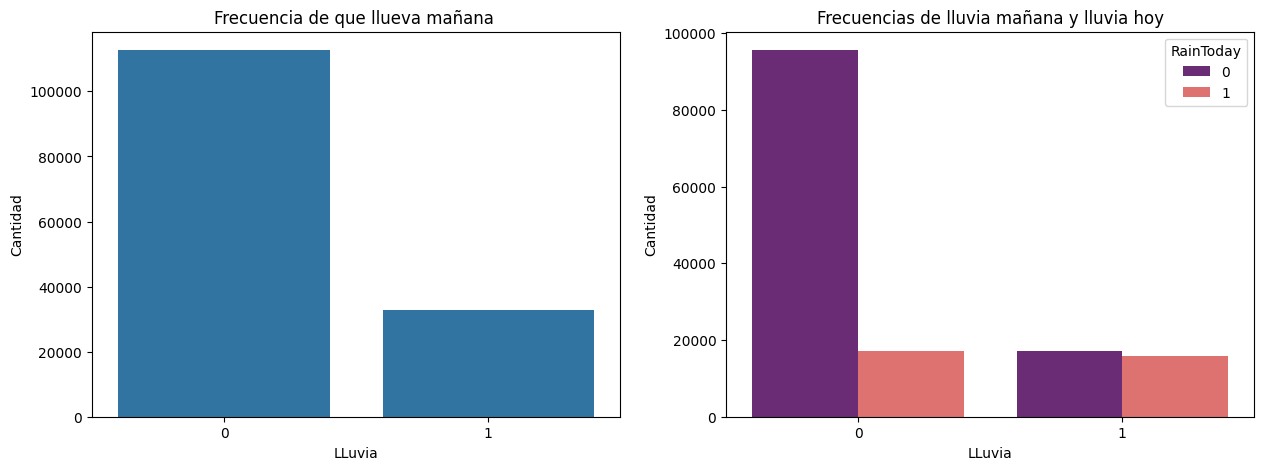

In [49]:

fig, axes = plt.subplots(1,2 , figsize = (15,5))

sns.countplot(ax=axes[0], x = "RainTomorrow", data = df)
axes[0].set_title("Frecuencia de que llueva mañana ")
axes[0].set_xlabel("LLuvia") 
axes[0].set_ylabel("Cantidad")

sns.countplot(ax=axes[1], x = "RainTomorrow", hue = 'RainToday', data = df, palette="magma")
axes[1].set_title("Frecuencias de lluvia mañana y lluvia hoy")
axes[1].set_xlabel("LLuvia") 
axes[1].set_ylabel("Cantidad")



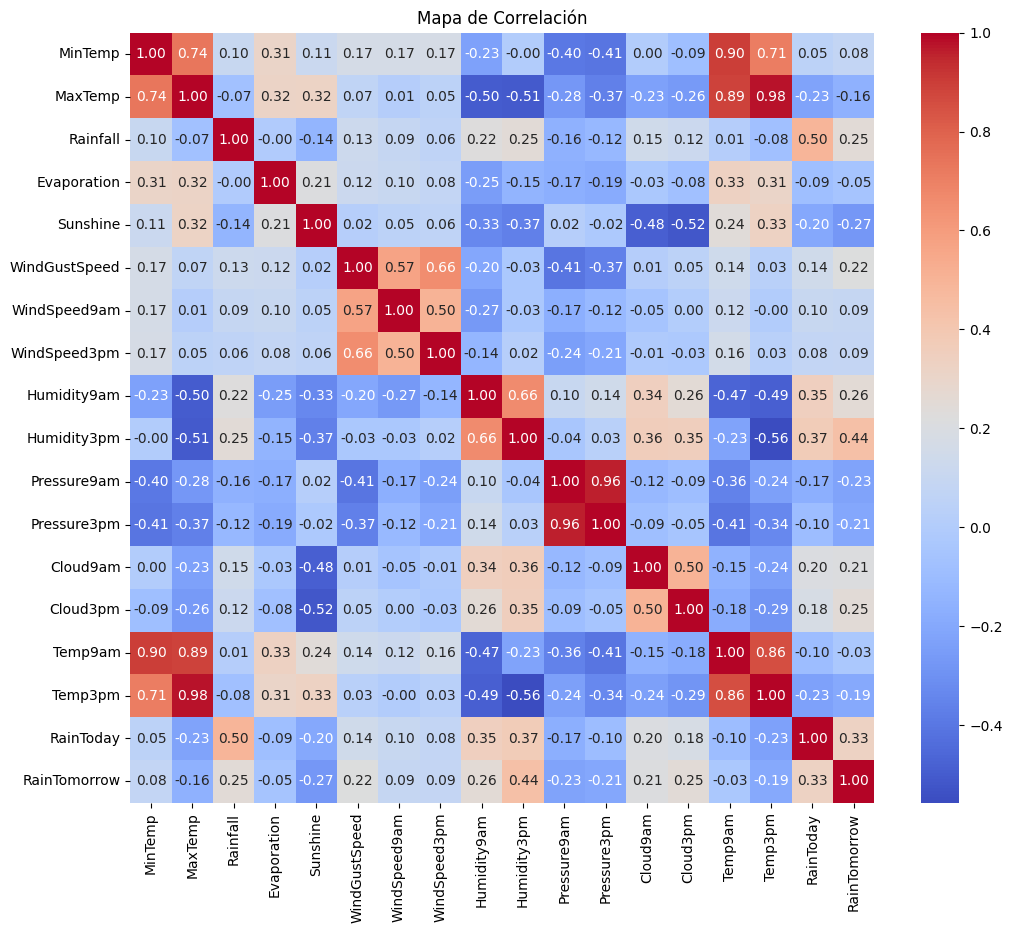

In [50]:
# Excluir columnas no numéricas del cálculo de correlación
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calcular la correlación entre las variables numéricas
correlation_matrix = numeric_df.corr()

# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Visualizar el mapa de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlación')
plt.show()



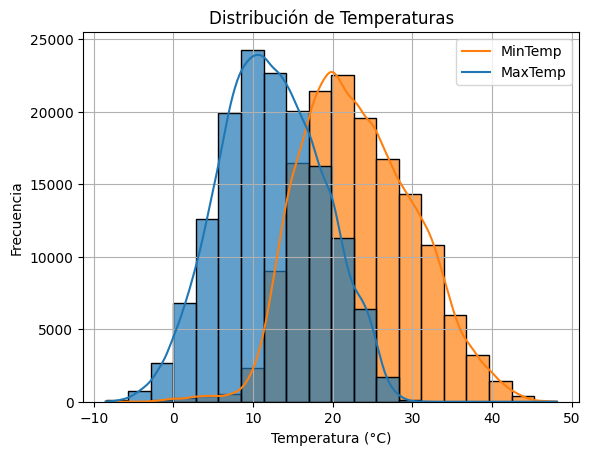

In [51]:
# Visualización 1: Histograma de distribución de temperaturas
plt.figure()
sns.histplot(df[['MinTemp', 'MaxTemp']], bins=20, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribución de Temperaturas')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia')
plt.legend(['MinTemp', 'MaxTemp'])
plt.grid(True)

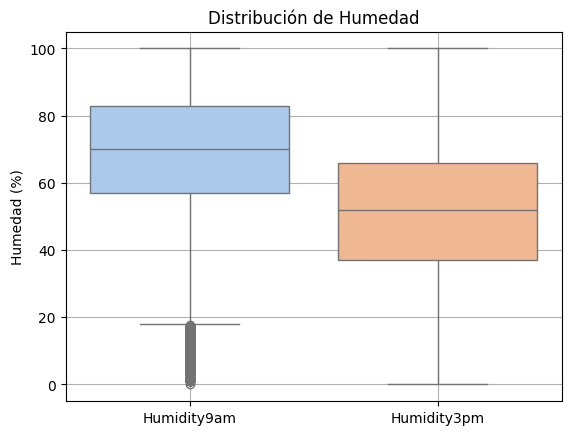

In [52]:
# Visualización 2: Boxplot de Humedad
plt.figure()
sns.boxplot(data=df[['Humidity9am', 'Humidity3pm']], palette='pastel')
plt.title('Distribución de Humedad')
plt.ylabel('Humedad (%)')
plt.grid(True)
plt.show()

In [53]:
# Modificar el DataFrame original eliminando la columna "Location"
df.drop('Location', axis=1, inplace=True)




In [54]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,13.4,22.9,0.6,6.534638,7.649576,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.00,5.087722,16.9,21.8,0,0
1,2008-12-02,7.4,25.1,0.0,6.534638,7.649576,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,7.75,5.087722,17.2,24.3,0,0
2,2008-12-03,12.9,25.7,0.0,6.534638,7.649576,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,7.50,2.000000,21.0,23.2,0,0
3,2008-12-04,9.2,28.0,0.0,6.534638,7.649576,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,7.25,5.000000,18.1,26.5,0,0
4,2008-12-05,17.5,32.3,1.0,6.534638,7.649576,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.00,8.000000,17.8,29.7,0,0


In [55]:
# Encoding
# Obtener todos los valores únicos de las columnas especificadas
valores_unicos_WindGustDir = df['WindGustDir'].unique()
valores_unicos_WindDir9am = df['WindDir9am'].unique()
valores_unicos_WindDir3pm = df['WindDir3pm'].unique()

# Mostrar los valores únicos de cada columna
print("Valores únicos de WindGustDir:", valores_unicos_WindGustDir)
print("Valores únicos de WindDir9am:", valores_unicos_WindDir9am)
print("Valores únicos de WindDir3pm:", valores_unicos_WindDir3pm)


Valores únicos de WindGustDir: ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
Valores únicos de WindDir9am: ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'SSW' 'N' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
Valores únicos de WindDir3pm: ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']


In [56]:
# Crear una instancia del codificador one-hot para cada columna categórica
# Definir un diccionario de mapeo para cada columna categórica
mapping_WindGustDir = {'W': 0, 'WNW': 1, 'WSW': 2, 'NE': 3, 'NNW': 4, 'N': 5, 'NNE': 6, 'SW': 7, 
                       'ENE': 8, 'SSE': 9, 'S': 10, 'NW': 11, 'SE': 12, 'ESE': 13, 'E': 14, 'SSW': 15}

mapping_WindDir9am = {'W': 0, 'NNW': 1, 'SE': 2, 'ENE': 3, 'SW': 4, 'SSE': 5, 'S': 6, 'NE': 7, 
                      'SSW': 8, 'N': 9, 'WSW': 10, 'ESE': 11, 'E': 12, 'NW': 13, 'WNW': 14, 'NNE': 15}

mapping_WindDir3pm = {'WNW': 0, 'WSW': 1, 'E': 2, 'NW': 3, 'W': 4, 'SSE': 5, 'ESE': 6, 'ENE': 7, 
                      'NNW': 8, 'SSW': 9, 'SW': 10, 'SE': 11, 'N': 12, 'S': 13, 'NNE': 14, 'NE': 15}

# Reemplazar los valores categóricos por los valores numéricos utilizando el diccionario de mapeo
df['WindGustDir'] = df['WindGustDir'].replace(mapping_WindGustDir)
df['WindDir9am'] = df['WindDir9am'].replace(mapping_WindDir9am)
df['WindDir3pm'] = df['WindDir3pm'].replace(mapping_WindDir3pm)

# Mostrar las primeras filas del DataFrame con las columnas transformadas
print(df[['WindGustDir', 'WindDir9am', 'WindDir3pm']].head())



C:\Users\HP\AppData\Local\Temp\ipykernel_11416\1087614982.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['WindGustDir'] = df['WindGustDir'].replace(mapping_WindGustDir)
C:\Users\HP\AppData\Local\Temp\ipykernel_11416\1087614982.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['WindDir9am'] = df['WindDir9am'].replace(mapping_WindDir9am)


   WindGustDir  WindDir9am  WindDir3pm
0            0           0           0
1            1           1           1
2            2           0           1
3            3           2           2
4            0           3           3


C:\Users\HP\AppData\Local\Temp\ipykernel_11416\1087614982.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['WindDir3pm'] = df['WindDir3pm'].replace(mapping_WindDir3pm)


In [ ]:
valores_unicos_WindGustDir = df['WindGustDir'].unique()

print("Valores únicos de WindDir3pm:", valores_unicos_WindDir3pm)